In [2]:
# Common imports
import numpy as np
import pandas as pd  

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
# load data and split into training and test sets    
from sklearn.model_selection import train_test_split

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataset = pd.read_csv("https://raw.githubusercontent.com/kexin516/Diabetes-dataset-Classifier-Comparison/main/pima-indians-diabetes.data.csv", names = names)  # to point to data

In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
X = dataset.drop('class', axis=1)  
y = dataset['class']

In [7]:
# Compare the performance of a decision tree, bagging classifier, random forest and a boosting classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
# 1. Decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.7467532467532467


In [9]:
# 2. Bagging ensembles
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7597402597402597


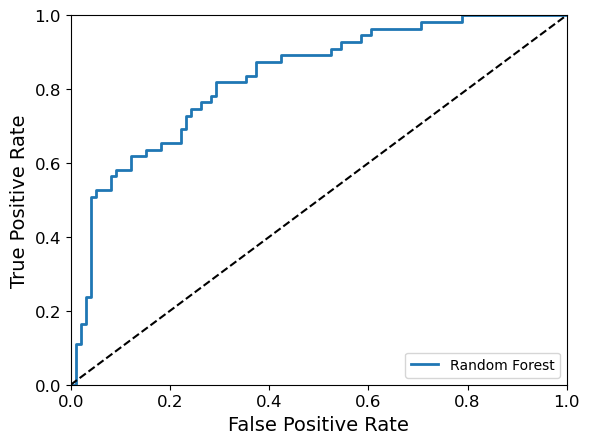

0.7662337662337663


In [11]:
# 3. Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_prob_rf = rnd_clf.predict_proba(X_test)

y_pred_rf = rnd_clf.predict(X_test)

np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

y_score_rf = y_prob_rf[:,1]
fpr_rf,tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr_rf,tpr_rf, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

# Calculate accuracy score
print(accuracy_score(y_test, y_pred_rf))

In [12]:
# 4. Boosting method, three boosting algorithms
# First Ada boost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))

0.7467532467532467


In [13]:
# Modify the random forest classifier tree depth hyper-parameter for the depth of 2-5
for max_depth in range(2, 6):
    rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=max_depth, n_jobs=-1, random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    print(f"Random Forest (max_depth={max_depth}) accuracy: ", accuracy_score(y_test, y_pred_rf))

Random Forest (max_depth=2) accuracy:  0.7857142857142857
Random Forest (max_depth=3) accuracy:  0.7792207792207793
Random Forest (max_depth=4) accuracy:  0.7857142857142857
Random Forest (max_depth=5) accuracy:  0.7662337662337663


In [14]:
# From the results, it seems that max_depth=2 and max_depth=4 provide the best performance, with max_depth=4 achieving a slight edge over max_depth=3. However, max_depth=5 seems to lead to overfitting.
# Deeper Trees (max_depth=5) overfit the training data, which means they perform well on the training set but fail to generalize well to the test data, resulting in lower accuracy.
# Shallow Trees tend to underfit the data, as they don't capture enough detail, resulting in slightly better performance than deeper trees.

In [15]:
# For the Adaboost classifier, modify the learning rate to a higher rate and a low rate 
for learning_rate in [0.01, 0.5, 1.0]:
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=learning_rate, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_ada = ada_clf.predict(X_test)
    print(f"AdaBoost (learning_rate={learning_rate}) accuracy: ", accuracy_score(y_test, y_pred_ada))

AdaBoost (learning_rate=0.01) accuracy:  0.7792207792207793
AdaBoost (learning_rate=0.5) accuracy:  0.7467532467532467
AdaBoost (learning_rate=1.0) accuracy:  0.7467532467532467


In [16]:
# In this case, a learning rate of 0.01 performs the best, providing the highest accuracy of 77.92%.
# A lower learning rate makes the model learn more slowly, reducing the chance of overfitting but might result in underfitting.
# With higher learning rates, the model starts to rely too much on individual decision trees, which may overfit the training data and not generalize well to the test data.

In [17]:
# Compare the performance of all above models using cross-validation
from sklearn.model_selection import cross_val_score

# Define the models with their hyperparameters (tuned versions)
models = {
    # 1. Decision Tree
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    
    # 2. Bagging Ensemble
    "Bagging": BaggingClassifier(
        DecisionTreeClassifier(random_state=42),
        n_estimators=500,
        max_samples=100,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ),
    
    # 3. Random Forests (with different max_depth values for tuning)
    "Random Forest (max_depth=2)": RandomForestClassifier(
        n_estimators=500,
        max_depth=2,
        n_jobs=-1,
        random_state=42
    ),
    "Random Forest (max_depth=3)": RandomForestClassifier(
        n_estimators=500,
        max_depth=3,
        n_jobs=-1,
        random_state=42
    ),
    "Random Forest (max_depth=4)": RandomForestClassifier(
        n_estimators=500,
        max_depth=4,
        n_jobs=-1,
        random_state=42
    ),
    "Random Forest (max_depth=5)": RandomForestClassifier(
        n_estimators=500,
        max_depth=5,
        n_jobs=-1,
        random_state=42
    ),
    
    # 4. AdaBoost Classifier (with different learning rates for tuning)
    "AdaBoost (lr=0.01)": AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200,
        algorithm="SAMME.R",
        learning_rate=0.01,
        random_state=42
    ),
    "AdaBoost (lr=0.5)": AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200,
        algorithm="SAMME.R",
        learning_rate=0.5,
        random_state=42
    ),
    "AdaBoost (lr=1.0)": AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200,
        algorithm="SAMME.R",
        learning_rate=1.0,
        random_state=42
    )
}

# Evaluate each model using 5-fold cross-validation
print("Final Model Comparison (5-Fold Cross-Validation):\n")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

Final Model Comparison (5-Fold Cross-Validation):

Decision Tree: Mean Accuracy = 0.7163, Std = 0.0585
Bagging: Mean Accuracy = 0.7618, Std = 0.0297
Random Forest (max_depth=2): Mean Accuracy = 0.7461, Std = 0.0141
Random Forest (max_depth=3): Mean Accuracy = 0.7604, Std = 0.0224
Random Forest (max_depth=4): Mean Accuracy = 0.7657, Std = 0.0250
Random Forest (max_depth=5): Mean Accuracy = 0.7722, Std = 0.0301
AdaBoost (lr=0.01): Mean Accuracy = 0.7409, Std = 0.0198
AdaBoost (lr=0.5): Mean Accuracy = 0.7605, Std = 0.0291
AdaBoost (lr=1.0): Mean Accuracy = 0.7513, Std = 0.0272


In [18]:
# Results are different from previous tests:
# In cross-validation results, the Random Forest with max_depth=5 performed the best. 
# However, in previous experiment with tuning the max_depth of Random Forest, deeper trees (max_depth=5) led to overfitting, resulting in worse performance on the test set.
# AdaBoost with learning_rate=0.01 performed the best in the earlier tuning. But in the cross-validation results, AdaBoost with learning_rate=0.5 was the top performer.

# Why different?
# The earlier results from single test set evaluations were influenced by overfitting or underfitting on that particular data split.
# Cross-validation offers a more reliable estimate of model performance because it averages results over multiple folds and splits, reducing the bias that can arise from a single test set.
# For Random Forest, deeper trees (max_depth=4 or max_depth=5) are more likely to generalize well, according to cross-validation results, even though they may overfit in some specific test cases.
# For AdaBoost, learning_rate=0.5 generally works better than lower learning rates (0.01), as it strikes the right balance between learning speed and generalization.